# Git

In [1]:
!git clone https://github.com/Mike030668/Constructor_nets/

Cloning into 'Constructor_nets'...
remote: Enumerating objects: 40, done.
remote: Counting objects: 100% (40/40), done.
remote: Compressing objects: 100% (35/35), done.
remote: Total 40 (delta 11), reused 18 (delta 2), pack-reused 0
Unpacking objects: 100% (40/40), done.


In [10]:
import tensorflow as tf
import numpy as np
from Constructor_nets.Unet_level_control import Unet_const

In [17]:
num_classes = 1
image_shape = (128, 320, 3)

num_classes = 1
initializer = tf.keras.initializers.HeNormal()
regularizer = tf.keras.regularizers.l1_l2(l1=0.001, l2=0.0001)

model = Unet_const(image_shape,
                    num_classes,
                    low_degree=2,
                    kernel_regularizer=regularizer,
                    kernel_initializer=initializer,
                    residual=True,
                    enc_dropout=[('Spatial', 0.15)], 
                    enc_pool=['Maxpool', 'Avrpool'],
                    enc_activ=['selu', 'relu'],  # None, #
                    enc_qtyconv=[3, 2],
                    enc_kernels=[(3, 3), (2, 2)],
                    enc_usebtchnorm=(True, False),
                    dec_uplayer='Conv2DT', 
                    dec_usebtchnorm= False,
                    dec_activ=['selu','relu'],  # None, #'selu',
                    dec_qtyconv=[3, 2],
                    dec_kernels=[(3, 3), (2, 2)],
                    pretatrain_net='vgg_19', # 'IncResNetV2',  # 
                    train_pretrain_lays = False,
                    out_activ='sigmoid')()
model.summary()

Сформирована сеть с глубиной 7 вычисленных уровней.
 

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 128, 320, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_92 (Conv2D)             (None, 128, 320, 25  700         ['input_6[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_29 (BatchN  (None, 128, 320, 25  100        ['conv2d_92[0][0]']              
 ormalization)                  )    

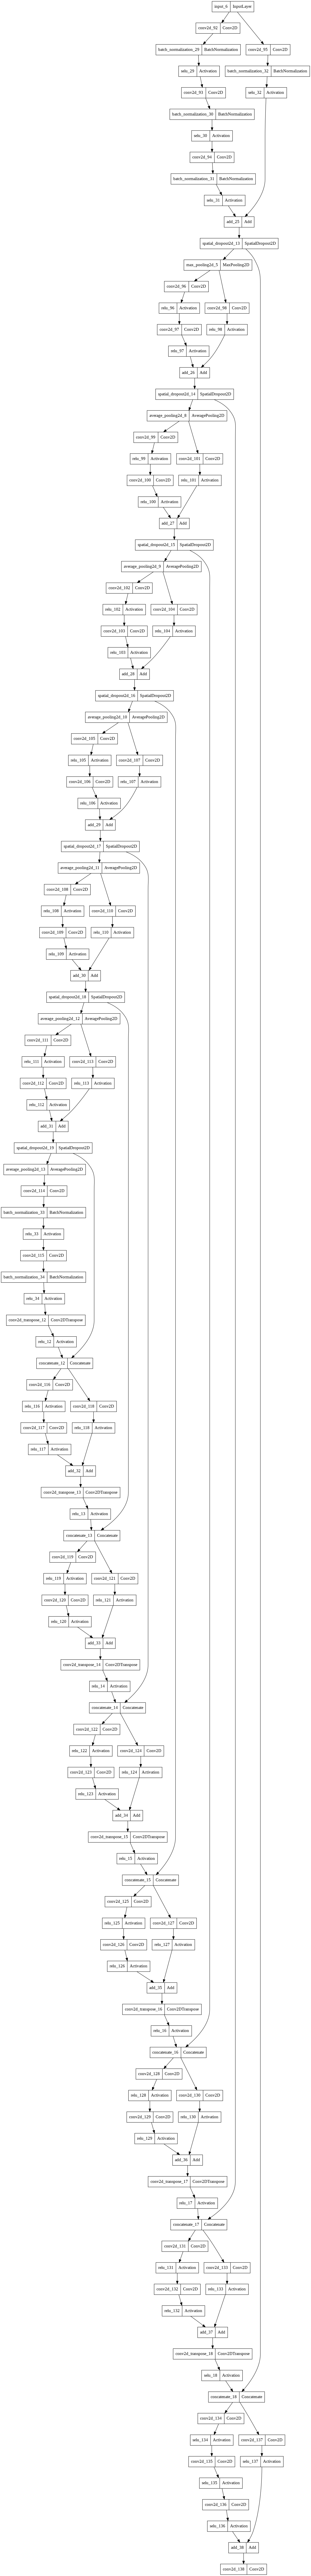

In [18]:
tf.keras.utils.plot_model(model)